In [33]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('features_2.csv', sep=';')
X = df.drop(['genre'], axis=1) 
Y = df[["genre"]]

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y.values, test_size=0.3, shuffle=True)

In [19]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
print ("Logistic regression multiclass Train Accuracy :: ", lr.score(X_train, y_train.ravel()))

Logistic regression multiclass Train Accuracy ::  0.7556907659269864


In [22]:
print ("Logistic regression multiclass Test Accuracy :: ", lr.score(X_test, y_test))

Logistic regression multiclass Test Accuracy ::  0.7421509686038744


In [24]:
lr_mul = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train.ravel())

In [26]:
print ("Multinomial Logistic regression Train Accuracy :: ", lr_mul.score(X_train, y_train))
print ("Multinomial Logistic regression Test Accuracy :: ", lr_mul.score(X_test, y_test))

Multinomial Logistic regression Train Accuracy ::  0.7715819613457409
Multinomial Logistic regression Test Accuracy ::  0.7570140280561122


In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
preds = lr_mul.predict(X_test)
y_orig = y_test
cm = confusion_matrix(preds, y_orig)

Normalized confusion matrix


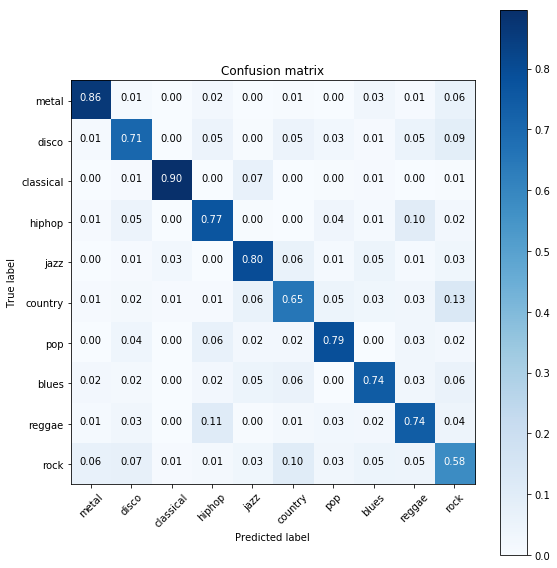

In [35]:
genres = {'metal': 0, 'disco': 1, 'classical': 2, 'hiphop': 3, 'jazz': 4, 
          'country': 5, 'pop': 6, 'blues': 7, 'reggae': 8, 'rock': 9}


keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plt.figure(figsize=(8,8))
plot_confusion_matrix(cm, keys, normalize=True)